<div class="clearfix" style="padding: 10px; padding-left: 0px">

<p>
<a href="http://bombora.com"><img src="https://app.box.com/shared/static/e0j9v1xjmubit0inthhgv3llwnoansjp.png" width="200px" class="pull-right" style="display: inline-block; margin: 5px; vertical-align: middle;"></a>
<h1> Bombora Data Science: <br> *Interview Exam* </h1>
</div>
<img width="200px" src=https://app.box.com/shared/static/15slg1mvjd1zldbg3xkj9picjkmhzpa5.png >

---

# Welcome

Welcome! This notebook contains interview exam questions referenced in the *Instructions* section in the `README.md`—please read that first, *before* attempting to answer questions here.

<div class="alert alert-info" role="alert" style="margin: 10px">
<p>**ADVICE**</p>
<p>*Do not* read these questions, and panic, *before* reading the instructions in `README.md`.</p>
</div>

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>**WARNING**</p>

<p>If using [try.jupyter.org](https://try.jupyter.org) do not rely on the server for anything you want to last - your server will be *deleted after 10 minutes of inactivity*. Save often and rember download notebook when you step away (you can always re-upload and start again)!</p>
</div>


## Have fun!

Regardless of outcome, getting to know you is important. Give it your best shot and we'll look forward to following up!

# Exam Questions

## 1. Algo + Data Structures

### Q 1.1: Fibionacci
![fib image](https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/Fibonacci_spiral_34.svg/200px-Fibonacci_spiral_34.svg.png)

#### Q 1.1.1
Given $n$ where $n \in \mathbb{N}$ (i.e., $n$ is an integer and $n > 0$), write a function `fibonacci(n)` that computes the Fibonacci number $F_n$, where $F_n$ is defined by the recurrence relation:

$$ F_n = F_{n-1} + F_{n-2}$$

with initial conditions of:

$$ F_1 = 1,  F_2 = 1$$

In [1]:
def fibonacci(n):
    """Function for nth fibonacci number, assume first two fibonacci numbers as 1 and 1
    n: the nth 
    return: the nth fibonacci number 
    """
    a = 1
    b = 1
    if n <= 0:
        return "Incorrect input"
    
    if n < 3:
        return 1
    
    for i in range(2,n):
        a, b = b, a + b
    return b


In [2]:
import unittest

class TestFibonacci(unittest.TestCase):

    def test_base_case(self):
        self.assertEqual(fibonacci(2), 1)

    def test_10th(self):
        self.assertEqual(fibonacci(10), 55)
        
    def test_invaid(self):
        self.assertEqual(fibonacci(-1), "Incorrect input")

if __name__ == "__main__":
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

...
----------------------------------------------------------------------
Ran 3 tests in 0.005s

OK


#### Q 1.1.2
What's the complexity of your implementation?

Time Complexity: O(n)
Space Complexity: O(1)

#### Q 1.1.3
Consider an alternative implementation to compute Fibonacci number $F_n$ and write a new function, `fibonacci2(n)`.

In [3]:
def _fib2(n):
    """Helper function to calculate matrix recursively
    """
    if n == 0: 
        return (0, 1)
    
    half_n, is_n_odd = divmod(n, 2)
    f_n, f_n_plus_1 = _fib2(half_n)
    # matrix
    f_n_squared = f_n * f_n
    f_n_plus_1_squared = f_n_plus_1 * f_n_plus_1
    f_2n = 2 * f_n * f_n_plus_1 - f_n_squared
    f_2n_plus_1 = f_n_squared + f_n_plus_1_squared
    
    if is_n_odd:
        return (f_2n_plus_1, f_2n + f_2n_plus_1)
    return (f_2n, f_2n_plus_1)

def fibonacci2(n):
    """Function for nth fibonacci number, assume first two fibonacci numbers as 1 and 1
    n: the nth 
    return: the nth fibonacci number 
    """
    if n <= 0:
        return "Incorrect input"
    return _fib2(n)[0]

if __name__ == "__main__":
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

...
----------------------------------------------------------------------
Ran 3 tests in 0.008s

OK


### Above function based on the following two equations and matrix calculation
The idea is we calculate F2n and F2n+1 by Fn and Fn+1 recursively.

<img src="http://on30xvavr.bkt.clouddn.com/fib_example_1.png" width="400"> 
<img src="http://on30xvavr.bkt.clouddn.com/fib_example_2.png" width="600">

#### Q 1.1.4
What's the complexity of your implementation?

Time Complexity: O(log(n))  
Space Complexity: O(1)

#### Q 1.1.5
What are some examples of optimizations that could improve computational performance?


1. Use more extra space. Since we use recursive method to calculate matrix, apparently for each fib(n/2) and fib(n/2-1), we did duplicate calculations. So, we can memorize these middle results, and stored in dictionary to efficiently look up. 
2. Use parallel (more compuation cluster). Still parallel programming is best for matrix manipulation. However, the size of matrix in this problem is small. If considering the latency between communication with different computation nodes. It may not better than single node. Need to test.
3. Reduce function call, and avoid 'slow' function.

### Q 1.2: Linked List
![ll img](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6d/Singly-linked-list.svg/500px-Singly-linked-list.svg.png)

#### Q 1.2.1
Consider a [singly linked list](https://en.wikipedia.org/wiki/Linked_list), $L$. Write a function `is_palindrome(L)` that detects if $L$ is a [palindrome](https://en.wikipedia.org/wiki/Palindrome), by returning a bool, `True` or `False`.


#### Q 1.2.2
What is the complexity of your implementation?

#### Q 1.2.3
Consider an alternative implementation to detect if L is a palindrome and write a new function, `is_palindrome2(L)`.

#### Q 1.2.4
What's the complexity of this implementation?


#### Q 1.2.5 
What are some examples of optimizations that could improve computational performance?


## 2. Prob + Stats

### Q 2.1: Finding $\pi$ in a random uniform?
![pi pie img](http://core2.staticworld.net/images/article/2016/03/pi-day-intro-100649273-carousel.idge.jpeg)


Given a uniform random generator $[0,1)$ (e.g., use your language's standard libary to generate random value), write a a function `compute_pi` to compute [$\pi$](https://en.wikipedia.org/wiki/Pi).

In [4]:
import math

import numpy as np
import matplotlib.pyplot as plt


def compute_pi(size):
    """Compute Pi from a uniform random generator
    size: sample size
    return: approximate pi
    """
    inside=0
    
    x = np.random.uniform(size=size)
    y = np.random.uniform(size=size) 
    
    for i, j in zip(x, y):
        if i*i + j*j <= 1:
            inside+=1
    return 4 * inside / size


def test(seed):
    np.random.seed(seed)

    sample_size = []
    pis = []
    errors = []
    
    print("{:<20}{:<20}{:<20}".format('Sample Size ', 'Computed PI ', 'Error '))
    for i in range(8):
        size = 10 ** i
        sample_size.append(size)
        tmp_pi = compute_pi(size)
        pis.append(tmp_pi)
        errors.append(np.abs(tmp_pi - math.pi))
        print("{:<20}{:<20}{:<20}".format(size, pis[-1], errors[-1]))
        
    return sample_size, errors

sample_size, errors = test(2)

Sample Size         Computed PI         Error               
1                   4.0                 0.8584073464102069  
10                  4.0                 0.8584073464102069  
100                 3.28                0.1384073464102067  
1000                3.2                 0.05840734641020706 
10000               3.1448              0.003207346410206924
100000              3.1396              0.0019926535897929476
1000000             3.13946             0.0021326535897929766
10000000            3.1407992           0.0007934535897931028


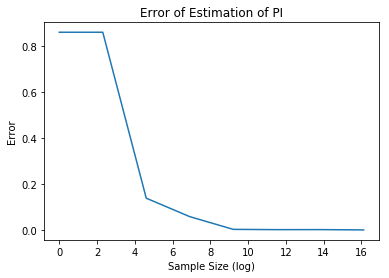

In [5]:
plt.plot(np.log(sample_size), errors)
plt.title('Error of Estimation of PI')
plt.xlabel('Sample Size (log)')
plt.ylabel('Error')
plt.show()

### Q 2.2: Making a 6-side die roll a 7?

![reno die image](http://thumbs.ebaystatic.com/images/g/IQ8AAOSwvzRXyagD/s-l225.jpg)

Using a single 6-side die, how can you generate a random number between 1 - 7?

### Q 2.3: Is normality uniform?

![normal and uniform distributions](https://qph.ec.quoracdn.net/main-qimg-f6ed71ed1d0059760fb63db384dcbcca-c)

Given draws from a normal distribution with known parameters, how can you simulate draws from a uniform distribution?

### Q 2.4: Should you pay or should you go?

![coin flip](https://lh5.ggpht.com/iwD6MnHeHVAXNBgrO7r4N9MQxxYi6wT9vb0Mqu905zTnNlBciONAA98BqafyjzC06Q=w300)

Let’s say we play a game where I keep flipping a coin until I get heads. If the first time I get heads is on the nth coin, then I pay you $2^{(n-1)}$ US dollars. How much would you pay me to play this game? Explain.

### Q 2.5: Uber vs. Lyft

![uber vs lyft](http://usiaffinity.typepad.com/.a/6a01347fc1cb08970c01bb0876bcbe970d-pi)

You request 2 UberX’s and 3 Lyfts. If the time that each takes to reach you is IID, what is the probability that all the Lyfts arrive first? What is the probability that all the UberX’s arrive first?